In [13]:
import pandas as pd
import numpy as np
import os
from glob import glob
from tqdm import tqdm
import seaborn as sns
sns.set(style = 'dark')
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


In [22]:
train_df = pd.read_csv("../data/raw/train-metadata.csv")
test_df = pd.read_csv("../data/raw/test-metadata.csv")

C:\Users\rakus\AppData\Local\Temp\ipykernel_18204\2827724242.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("../data/raw/train-metadata.csv")


In [23]:
train_df.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [24]:
# Fill NaN values based on 'patient_id'
train_df['age_approx'] = train_df.groupby('patient_id')['age_approx'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
train_df['sex'] = train_df.groupby('patient_id')['sex'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [25]:
train_df.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [26]:
enc = LabelEncoder()

In [27]:
train_df['sex_enc'] = enc.fit_transform(train_df.sex.astype('str'))
test_df['sex_enc'] = enc.transform(test_df.sex.astype('str'))

<Axes: xlabel='sex', ylabel='count'>

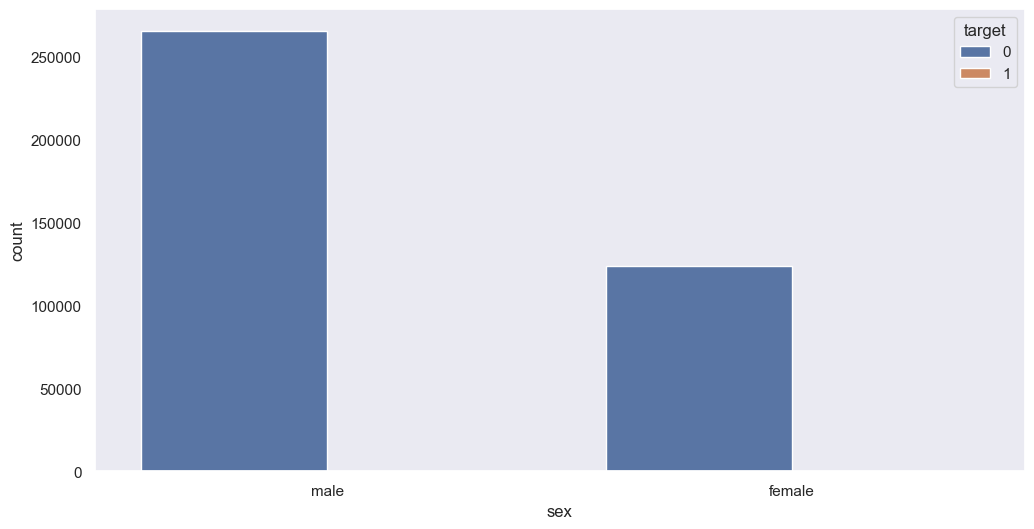

In [28]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'sex', hue = 'target', data = train_df)

In [29]:
test_df.anatom_site_general = test_df.anatom_site_general.fillna('unknown')
train_df.anatom_site_general = train_df.anatom_site_general.fillna('unknown')

In [30]:
train_df['anatom_enc']= enc.fit_transform(train_df.anatom_site_general.astype('str'))
test_df['anatom_enc']= enc.transform(test_df.anatom_site_general.astype('str'))

In [31]:
train_df['age_approx'] = train_df['age_approx'].fillna(train_df['age_approx'].mode().values[0])
test_df['age_approx']  = test_df['age_approx'].fillna(test_df['age_approx'].mode().values[0]) # Test data doesn't have any NaN in age_approx

In [32]:
train_df['age_enc']= enc.fit_transform(train_df['age_approx'].astype('str'))
test_df['age_enc']= enc.transform(test_df['age_approx'].astype('str'))

<Axes: xlabel='age_approx', ylabel='count'>

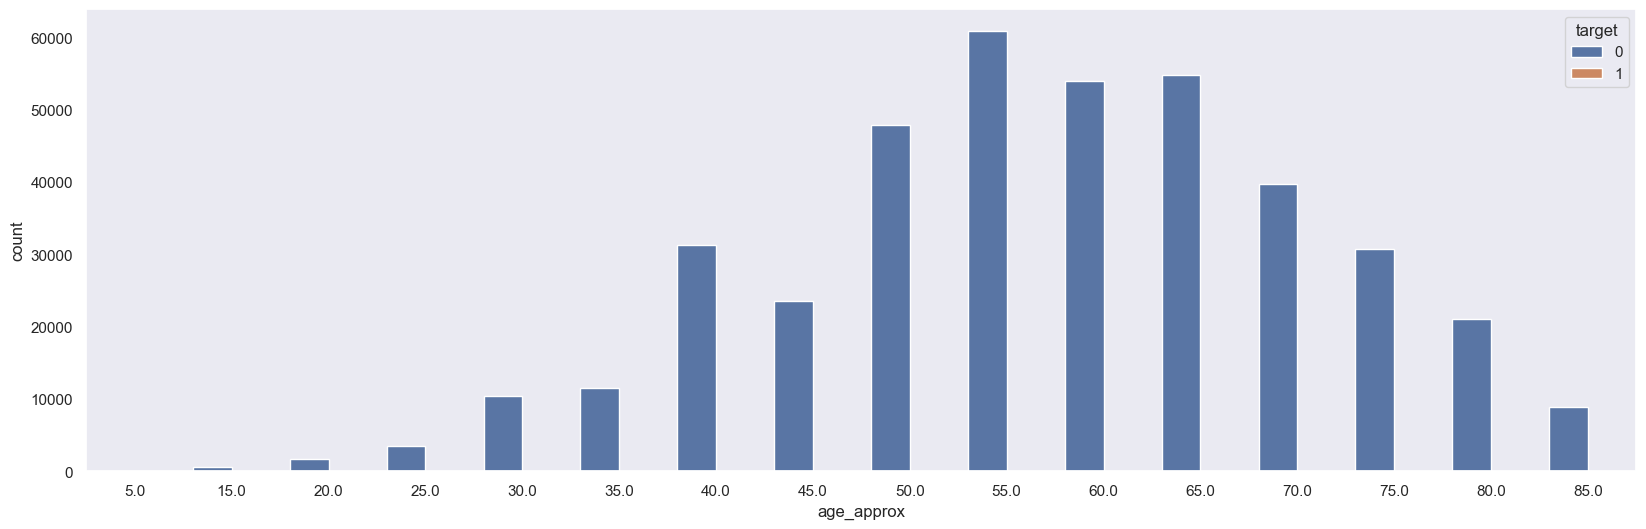

In [33]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'age_approx', hue = 'target', data = train_df)

In [35]:
train_df['n_images'] = train_df.isic_id.map(train_df.groupby(['patient_id']).isic_id.count())
test_df['n_images'] = test_df.isic_id.map(test_df.groupby(['patient_id']).isic_id.count())

In [36]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
categorize = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'uniform')
train_df['n_images_enc'] = categorize.fit_transform(train_df['n_images'].values.reshape(-1, 1)).astype(int).squeeze()
test_df['n_images_enc'] = categorize.transform(test_df['n_images'].values.reshape(-1, 1)).astype(int).squeeze()